<a href="https://colab.research.google.com/github/SDS-AAU/IntroStat/blob/master/Notebooks/AS_S3_Pingviner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #pandas (som næsten altid)
import numpy as np #numpy hvis der skal laves mere komplekse beregninger
import seaborn as sns #seaborn til plots
 
from matplotlib import pyplot as plt #plot control
 
sns.set() #plot style
 
 
from IPython.display import HTML #Youtube embed

# Anvendt statistik S2 - Hands-on

Her kommer vi til at se på et datasæt af pingviner (man kan læse mere om data her: https://github.com/allisonhorst/palmerpenguins)

![](https://github.com/allisonhorst/palmerpenguins/raw/master/man/figures/lter_penguins.png)

Hvis du har 2 minutter og vil vide mere om disse pingviner, så er der en kort video om dem...

In [ ]:
HTML('<iframe width="700" height="400" src="https://www.youtube-nocookie.com/embed/QS5jpQ6cpsg" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

In [ ]:
# Vi åbner vores penvin data direkte fra github
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# første 5 rækker
penguins.head()

In [ ]:
# info viser, at der er nogle datapunkter, der mangler...
penguins.info()

In [ ]:
# her sletter vi alle rækker, hvor der mangler data for en eller anden variabel

penguins = penguins.dropna()

In [ ]:
penguins.info()

## Simple frekvens beregninger

- Hvor mange han/hun pingviner?
- Hvor mange pingviner af de forskellige arter?
- Hvor mange øer er der?
- Gennemsnit for `body_mass_g` (vægt) per køn og art.


In [ ]:
# Hvor mange han/hun pengviner?
penguins.sex.value_counts()

In [ ]:
# Hvor mange pengviner af de forskellige arter?
penguins.species_short.value_counts()

In [ ]:
# Hvor mange øer (observationer af forskellige) er der?
penguins.island.value_counts()

In [ ]:
# Gennemsnit for body_mass_g (vægt) per køn.
penguins[penguins.sex == 'MALE'].body_mass_g.mean()

In [ ]:
penguins[penguins.sex == 'FEMALE'].body_mass_g.mean()

In [ ]:
# Gennemsnit for body_mass_g (vægt) per art.

penguins.species_short.unique() # vi starter med at se på hvor mange unike arter der er

In [ ]:
penguins.groupby(by='species_short').body_mass_g.mean() # groupby og mean er en nem måde at beregne det hele med lidt kode...

![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Mere om groupby og aggregation
(https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html)

## Beregning af nøgletal der beskriver fordeling

- median
- percentiler

In [ ]:
# median
penguins.body_mass_g.median()

In [ ]:
# 25 percentil
penguins.body_mass_g.quantile(q=0.25)

In [ ]:
# 75 percentil
penguins.body_mass_g.quantile(q=0.75)

In [ ]:
# med numpy:

np.percentile(penguins.body_mass_g, 25)

# hvis der er manglende data, så skal vi bruge "nanpercentile" i numpy
# np.nanpercentile(penguins.body_mass_g, 25) 


In [ ]:
# eller:

penguins.body_mass_g.describe()

In [ ]:
# og det kan man også bruge i kombination med groupby!

penguins.groupby('species_short').body_mass_g.describe()

## Visualisering af numeriske variable og fordelinger

Her kigger vi på forskellige muligheder at visualisere og præsentere fordelinger af én variable i Python med Seaborn

*   Swarmplot
*   Boxplot
* Histogram (KDE-plot) mm



In [ ]:
# plot body_mass_g for alle pengviner som swarmplat

sns.swarmplot(penguins.body_mass_g)


In [ ]:
#lidt større og med overskrift
plt.figure(figsize=(10,5))
plt.title('Vægt pingviner')

sns.swarmplot(penguins.body_mass_g)

En swarmplot er nok den nemmeste visualisering af en variable. Her plottes bare punkter for hver pengvin på 1 akse. Bagefer sorteres punkterne lidt...

Nedenunder er den udgave uden sortering (stripplot)

In [ ]:
#lidt større og med overskrift
plt.figure(figsize=(10,5))
plt.title('Vægt pingviner')

sns.stripplot(penguins.body_mass_g)

En swarmplot siger ikke alt for meget. Lad os prøve at lave en boxplot

![](https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png)

In [ ]:
plt.figure(figsize=(10,3))
plt.title('Vægt pingviner')

sns.boxplot(penguins.body_mass_g)


In [ ]:
plt.figure(figsize=(10,3))
plt.title('Vægt pingviner')

# to plots over hinanden
g = sns.boxplot(penguins.body_mass_g) # g = defineres for at kunne beskrive X-akse
sns.swarmplot(penguins.body_mass_g, palette='Oranges')

g.set(xlabel='Vægt i g')

In [ ]:
# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins, x = "body_mass_g", y = "sex")

In [ ]:
penguins.sex.unique()

In [ ]:
# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins[penguins.sex.isin(['MALE', 'FEMALE'])], x = "body_mass_g", y = "sex")

In [ ]:
# opdeling på art og køn

# opdeling: han/hun - pingviner

plt.figure(figsize=(10,6))
plt.title('Vægt pingviner')

sns.boxplot(data = penguins[penguins.sex.isin(['MALE', 'FEMALE'])], x = "body_mass_g", y = "species_short" , hue = "sex")

Kan vi bruge flere "datapunkter" som input til vores visualisering? Yes! Vi kan prøve at lave et histogram.

Lad os prøve at udvikle et histogram først fra bunden.


In [ ]:
#Vi kan skære vores data i intervaller (som aldersgrupper i Titanic)

penguins_cat = pd.cut(penguins.body_mass_g, bins = 15) #vi gemmer det i en ny "Series" udenfor vores penguins DataFrame

In [ ]:
# og sådan ser det ud hvis vi tæller hvor mange pingviner der findes inden for grupperne
penguins_cat.value_counts(sort=False)

In [ ]:
# og så kan vi lige plotte det (bare ved at bruge pandas indbyggede plot funktioner)
penguins_cat.value_counts(sort=False).plot(kind='bar')

In [ ]:
# Det kan også gøres nemmere

plt.figure(figsize=(10,5))
plt.title('Vægt Pingviner')

g = sns.distplot(penguins.body_mass_g, hist = True, kde = False, bins=15)

g.set(xlabel='Vægt i g')

In [ ]:
# Her tilføjer vi lige KDE og rug
plt.figure(figsize=(10,5))
plt.title('Vægt Pingviner')

g = sns.distplot(penguins.body_mass_g, hist = True, kde = True, rug=True, bins=15)

g.set(xlabel='Vægt i g')

Text(0.5, 1.0, 'Vægt pingviner')

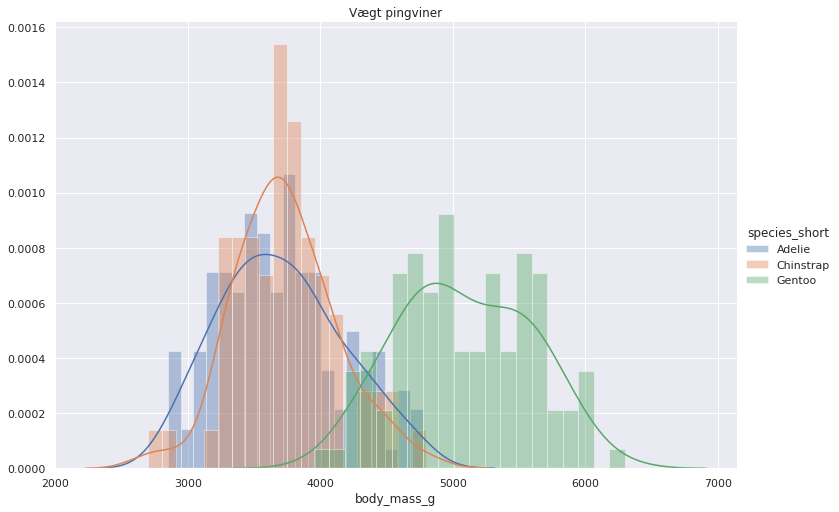

In [67]:
# Og så kan vi lige lave 3 histogrammer i en plot

g = sns.FacetGrid(penguins, hue="species_short", height=7, aspect=1.5)
g = g.map(sns.distplot, "body_mass_g", bins=20)
g.add_legend()
plt.title('Vægt pingviner')

## Varians og standard-afvigelse
I dette afsnit vil vi kigge nærmere på fordelingen af observationer. I de ovenstående afsnit kunne man gennem, blandt andet, boxplot og swarmplot se, at nogle af observationerne i data havde relativt stor afstand til de resterende punkter. Disse observationer er meget normale i det meste data, og bliver beskrevet som outliers. 

Selvom gennemsnit ofte kan give et fint indblik i hvordan en variabel fordeler sig, kan outliers have stor påvirkning på et gennemsnit. Spredningen er afgørende for hvor stor *usikkerhed* der er i målene for centrale tendenser, eksempelvis gennemsnit. 

Her vil i blive præsenteret for **varians** og **standardafvigelse**, to metoder til at vurdere spredning af data. 

---

**Varians** er betegnet som gennemsnittet af de kvadrerede afvigelser fra middelværdien


In [55]:
# Manuel måde at udregne varians
# Note: kun for at vise hvordan det ser ud "under the hood". Som i kan se, giver numpy's funktion samme output, og er meget simplere.
diff = penguins.body_mass_g-penguins.body_mass_g.mean()
diff_sq = diff**2
varians_ex = diff_sq.mean()
varians_ex

645821.7901771307

In [57]:
# Med numpy's indbyggede funktion
varians_np = np.var(penguins.body_mass_g)
varians_np

645821.7901771307

In [59]:
# OBS: Pandas antager at man arbejder med nøgletal for stikprøve

penguins.body_mass_g.var(ddof=0)

645821.7901771307

Eftersom variansen viser de kvadrerede afvigelser, bliver tallet i dette tilfælde meget højt. Vi er interesserede i at finde den gennemsnitlige spredning for observationerne i en variabel. Den kan vi finde ved at udregne kvadratroden af variansen, også kendt som standardafvigelsen. 
**Standardafvigelsen** er altså den gennemsnitlige afstand fra middelværdien i en variabel. 

In [60]:
# Igen er den manuelle udregning medført, for at vise hvad der foregår når i anvender den hurtige løsning fra numpy: np.std()
std_ex = np.sqrt(varians_np)
print(std_ex)

803.6303815667566


In [61]:
# Numpy's funktion for standardafvigelse
# Note: læg mærke til at man kalder den oprindelige variabel i np.std(). man behøver derfor ikke at udregne variansen manuelt når man kun er interesseret i standardafvigelsen til videre analyser. 
# variansen er inddraget her for at vise den manuelle metode til at udføre de matematiske formler der ligger til grund for de funktioner i anvender i Python/excel
std_np = np.std(penguins.body_mass_g)
std_np

803.6303815667566

In [62]:
# Eller i hverdagsbrug:

penguins.body_mass_g.std() #Stikprøve

804.836129253923

In [63]:
penguins.body_mass_g.std(ddof=0)

803.6303815667566

#### Øvelse: I ovenstående eksempel lærte vi, at den gennemsnitlige vægtvariation mellem alle pingviner er ca. 800 gram. Find standardafvigelsen for hver af de tre pingvinarter. 

Hint: groupby er meget alsidig, se hvad der sker hvis man kalder std() i forlængelse af grupperingen. 

In [64]:
#muligt svar 1
adelie = penguins[penguins.species_short == 'Adelie']

In [65]:
adelie.body_mass_g.std(ddof=0)

457.0468191507876

In [66]:
# bedste svar/ hurtigste. 
# note ddof er degrees of freedom. Svar med default ddof(1) bliver også accepteret
penguins.groupby('species_short').body_mass_g.std(ddof=0)

species_short
Adelie       457.046819
Chinstrap    381.498621
Gentoo       497.672316
Name: body_mass_g, dtype: float64

## Øvelse!

Går tilbage til kickstarter data og bruge standardafvigelsen som værktøj til at argumentere følgende:

Lav et subset uden outliers til højre (kun store værdier), hvor betingelsen er: outlier >= Q3 + 1.5*IQR.

Herfra:

Comics, design, music og games er de projektkategorier, hvor vi kan se den største mangfoldighed mht beløb, som bliver pledged (usd_pledged_real).

Design, journalism og food er dog i toppen, hvis vi kun ser på projekter, som kommer igennem.